In [67]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Declaring the 20 stocks and displaying the data from 2013 - end of 2022

In [68]:
# 5 stocks from each sectors
healthcare_stocks = ['LLY', 'JNJ', 'UNH', 'ABBV', 'TMO']
finance_stocks = ['BAC', 'JPM', 'V', 'WFC', 'MA']
technology_stocks = ['AAPL', 'MSFT', 'NVDA', 'ADBE', 'AVGO']
consumer_stocks = ['WMT', 'PG', 'COST', 'KO', 'PM']

In [69]:
# Taking the Adjusted closing price from the data
healthcare_prices = yf.download(healthcare_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']
finance_prices= yf.download(finance_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']
technology_prices = yf.download(technology_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']
consumer_prices = yf.download(consumer_stocks, start = "2013-01-01", end = '2023-01-01')['Adj Close']

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


In [70]:
# Displaying the data
print(healthcare_prices.head())
print(finance_prices.head())
print(technology_prices.head())
print(consumer_prices.head())

                 ABBV        JNJ        LLY        TMO        UNH
Date                                                             
2013-01-02  22.419838  52.369583  38.425724  62.571472  46.230911
2013-01-03  22.234707  52.295662  38.588707  62.378937  44.069408
2013-01-04  21.953814  52.894482  40.016769  62.927658  44.154160
2013-01-07  21.998501  52.783588  39.962440  63.418579  44.154160
2013-01-08  21.519720  52.790977  40.265118  63.023918  43.569294
                  BAC        JPM         MA          V        WFC
Date                                                             
2013-01-02   9.992598  33.084885  47.807560  35.941441  25.509893
2013-01-03   9.934454  33.018185  47.875961  35.969200  25.298832
2013-01-04  10.059049  33.603436  47.874081  36.262978  25.429834
2013-01-07  10.042438  33.640472  48.703739  36.522041  25.306103
2013-01-08   9.951065  33.707146  48.543427  36.862076  25.262442
                 AAPL       ADBE       AVGO       MSFT      NVDA
Date       

In [71]:
# Daily price returns of each stocks 
healthcare_returns = healthcare_prices.pct_change()
finance_returns = finance_prices.pct_change()
technology_returns = technology_prices.pct_change()
consumer_returns = consumer_prices.pct_change()

In [72]:
# Annualize returns and volatility Function
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1
def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)


In [73]:
periods_per_year = 252
healthcare_annualized_returns = annualize_rets(healthcare_returns, periods_per_year)
finance_annualized_returns = annualize_rets(finance_returns, periods_per_year)
technology_annualized_returns = annualize_rets(technology_returns, periods_per_year)
consumer_annualized_returns = annualize_rets(consumer_returns, periods_per_year)

healthcare_annualized_volatility = annualize_vol(healthcare_returns, periods_per_year)
finance_annualized_volatility = annualize_vol(finance_returns, periods_per_year)
technology_annualized_volatility = annualize_vol(technology_returns, periods_per_year)
consumer_annualized_volatility = annualize_vol(consumer_returns, periods_per_year)


In [74]:
print("Healthcare Annualized Returns:", healthcare_annualized_returns)
print("Finance Annualized Returns:", finance_annualized_returns)
print("Technology Annualized Returns:", technology_annualized_returns)
print("Consumer Goods Annualized Returns:", consumer_annualized_returns)

Healthcare Annualized Returns: ABBV    0.213753
JNJ     0.126020
LLY     0.251751
TMO     0.242915
UNH     0.275063
dtype: float64
Finance Annualized Returns: BAC    0.124852
JPM    0.146969
MA     0.218930
V      0.191004
WFC    0.046142
dtype: float64
Technology Annualized Returns: AAPL    0.226728
ADBE    0.242831
AVGO    0.366073
MSFT    0.265682
NVDA    0.478486
dtype: float64
Consumer Goods Annualized Returns: COST    0.185538
KO      0.087750
PG      0.113524
PM      0.067107
WMT     0.098509
dtype: float64


In [75]:
print("Healthcare Annualized Volatility:", healthcare_annualized_volatility)
print("Finance Annualized Volatility:", finance_annualized_volatility)
print("Technology Annualized Volatility:", technology_annualized_volatility)
print("Consumer Goods Annualized Volatility:", consumer_annualized_volatility)

Healthcare Annualized Volatility: ABBV    0.271654
JNJ     0.176796
LLY     0.257154
TMO     0.242967
UNH     0.253458
dtype: float64
Finance Annualized Volatility: BAC    0.307505
JPM    0.268064
MA     0.273649
V      0.251833
WFC    0.295154
dtype: float64
Technology Annualized Volatility: AAPL    0.290626
ADBE    0.315261
AVGO    0.346119
MSFT    0.270340
NVDA    0.442733
dtype: float64
Consumer Goods Annualized Volatility: COST    0.208185
KO      0.181020
PG      0.183174
PM      0.225189
WMT     0.205491
dtype: float64


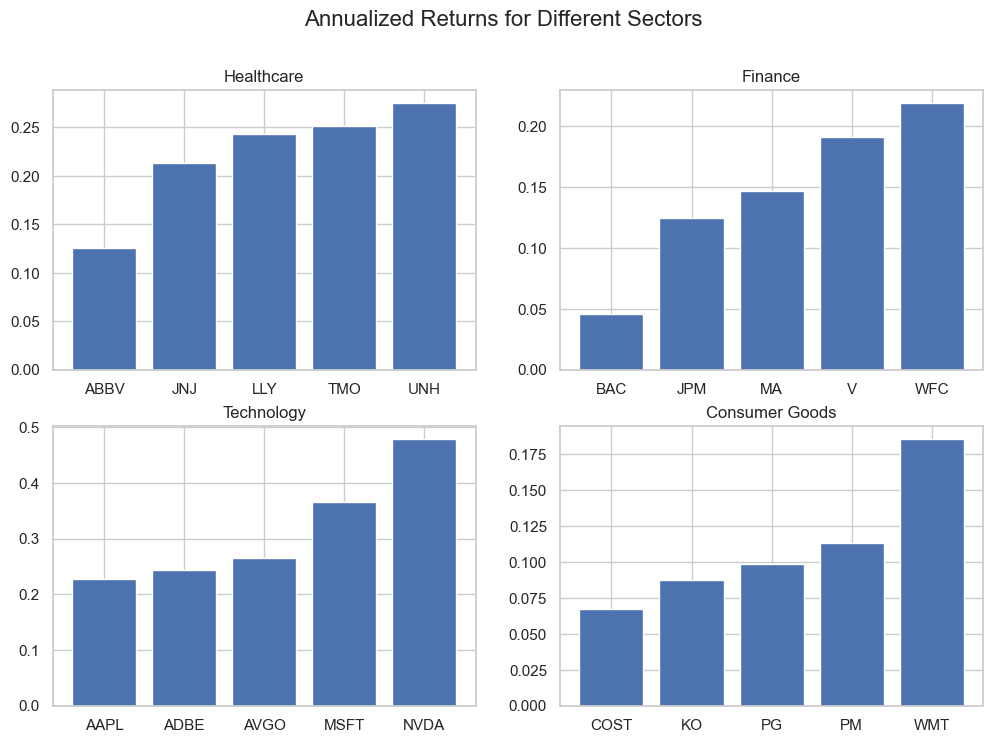

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Annualized Returns for Different Sectors', fontsize=16)

axes[0, 0].bar(healthcare_annualized_returns.index, healthcare_annualized_returns.sort_values())
axes[0, 0].set_title('Healthcare')

axes[0, 1].bar(finance_annualized_returns.index, finance_annualized_returns.sort_values())
axes[0, 1].set_title('Finance')

axes[1, 0].bar(technology_annualized_returns.index, technology_annualized_returns.sort_values())
axes[1, 0].set_title('Technology')

axes[1, 1].bar(consumer_annualized_returns.index, consumer_annualized_returns.sort_values())
axes[1, 1].set_title('Consumer Goods')

plt.show()

#### Combining the stocks to calculate the best and worst risk-returns(Sharpe Ratio)

In [77]:
stocks_data = pd.DataFrame({
    'Symbol': healthcare_stocks + finance_stocks + technology_stocks + consumer_stocks,
    'Annualized Return': healthcare_annualized_returns.tolist() + finance_annualized_returns.tolist() +
                          technology_annualized_returns.tolist() + consumer_annualized_returns.tolist(),
    'Annualized Volatility': healthcare_annualized_volatility.tolist() + finance_annualized_volatility.tolist() +
                             technology_annualized_volatility.tolist() + consumer_annualized_volatility.tolist()
})
stocks_data

,Symbol,Annualized Return,Annualized Volatility
0,LLY,0.213753,0.271654
1,JNJ,0.126020,0.176796
2,UNH,0.251751,0.257154
3,ABBV,0.242915,0.242967
4,TMO,0.275063,0.253458
5,BAC,0.124852,0.307505
6,JPM,0.146969,0.268064
7,V,0.218930,0.273649
8,WFC,0.191004,0.251833
9,MA,0.046142,0.295154


In [78]:
risk_free_rate = 0.0  # Assuming this is the Risk Free Rate, but it can be adjusted
stocks_data['Sharpe Ratio'] = (stocks_data['Annualized Return'] - risk_free_rate) / stocks_data['Annualized Volatility']

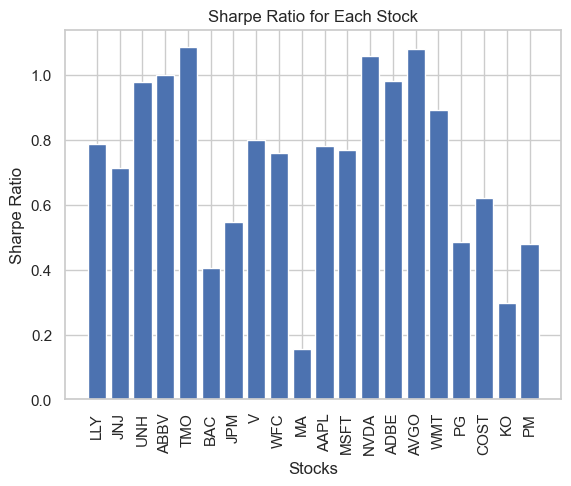

In [79]:
plt.bar(stocks_data['Symbol'], stocks_data['Sharpe Ratio'])
plt.xlabel('Stocks')
plt.xticks(rotation=90)
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio for Each Stock')
plt.show()

In [80]:
best_stock = stocks_data.loc[stocks_data['Sharpe Ratio'].idxmax()]
worst_stock = stocks_data.loc[stocks_data['Sharpe Ratio'].idxmin()]

In [81]:
print("Stock with the Best Risk-Return Profile:")
print(best_stock)

print("\nStock with the Worst Risk-Return Profile:")
print(worst_stock)

Stock with the Best Risk-Return Profile:
Symbol                        TMO
Annualized Return        0.275063
Annualized Volatility    0.253458
Sharpe Ratio             1.085244
Name: 4, dtype: object

Stock with the Worst Risk-Return Profile:
Symbol                         MA
Annualized Return        0.046142
Annualized Volatility    0.295154
Sharpe Ratio             0.156333
Name: 9, dtype: object


#### Risk-Returns Vary with Sectors

In [85]:
sector_data = pd.DataFrame({
    'Sector': ['Healthcare', 'Finance', 'Tech', 'Consumer Goods'],
    'Average Annualized Return': [healthcare_annualized_returns.mean(), finance_annualized_returns.mean(),
                                   technology_annualized_returns.mean(), consumer_annualized_returns.mean()],
    'Average Annualized Volatility': [healthcare_annualized_volatility.mean(), finance_annualized_volatility.mean(),
                                       technology_annualized_volatility.mean(), consumer_annualized_volatility.mean()]
})


,Sector,Average Annualized Return,Average Annualized Volatility
0,Healthcare,0.221900,0.240406
1,Finance,0.145579,0.279241
2,Tech,0.315960,0.333016
3,Consumer Goods,0.110486,0.200612


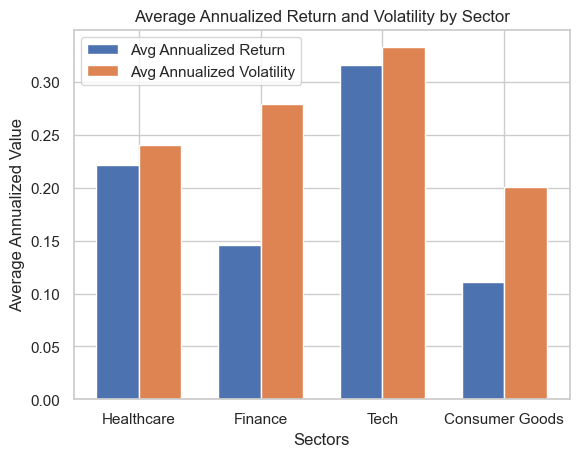

In [102]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.35
index = np.arange(len(sector_data['Sector']))

plt.bar(index, sector_data['Average Annualized Return'], bar_width, label='Avg Annualized Return')
plt.bar(index + bar_width, sector_data['Average Annualized Volatility'], bar_width, label='Avg Annualized Volatility')

plt.xlabel('Sectors')
plt.ylabel('Average Annualized Value')
plt.title('Average Annualized Return and Volatility by Sector')
plt.xticks(index + bar_width / 2, sector_data['Sector'])
plt.legend()

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


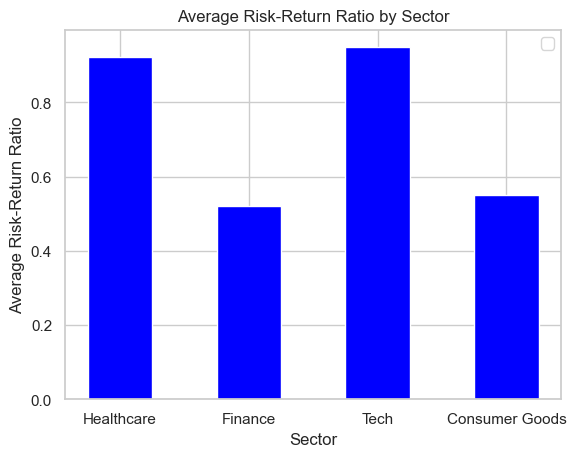

In [113]:
sector_data['Average Risk-Return Ratio'] = sector_data['Average Annualized Return'] / sector_data['Average Annualized Volatility']

bar_width = 0.5
index = np.arange(len(sector_data['Sector']))

plt.bar(index, sector_data['Average Risk-Return Ratio'], bar_width, color='blue')

plt.xlabel('Sector')
plt.ylabel('Average Risk-Return Ratio')
plt.title('Average Risk-Return Ratio by Sector')
plt.xticks(index, sector_data['Sector'])
plt.legend()

plt.show()
